# Explicit integration implementation

The Cam Clay plasticity model was formulated by researchers as Cambridge University and is one of the most widely used models for clay-like soils. The model uses critical state soil mechanics concepts, and eventually reaches a condition in which the plastic shear strain rate increases while the plastic volumetric strain rate remains constant. The model has parallel isotropic consolidation line and critical state line in $e-lnp'$ space. It consists of an elliptical yield surface in q-p space. It uses an associated flow rule.

## Yield Function  

$f(p,q,p_c,M) = \left(\frac{q}{M}\right)^2 + p\left(p-p_c\right)$  

$p$ = mean effective stress  

$q$ = deviatoric stress invariant  

$p_c$ = maximum past pressure  

$M$ = slope of critical state line in q-p space  

<IPython.core.display.Javascript object>


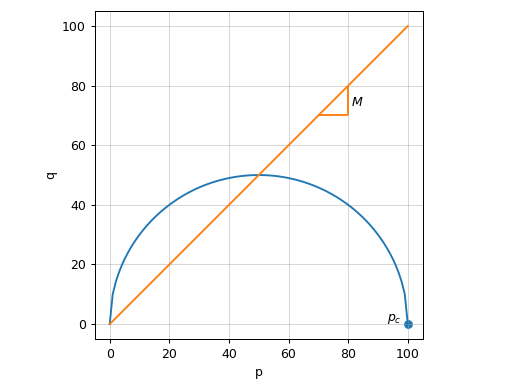

In [137]:
import numpy as np
import matplotlib.pyplot as plt

def f(q,p,M,pc):
    return (q/M)**2 + p*(p-pc)

M = 1.0
pc = 100
p = np.linspace(0,pc,100)
q = M*np.sqrt(p*(pc-p))


fig, ax = plt.subplots()
ax.plot(p,q)
ax.plot(p,M*p)
ax.scatter(pc,0)
ax.grid(True,alpha=0.5)
ax.set_aspect('equal')
ax.set_xlabel('p')
ax.set_ylabel('q')
ax.annotate(r'$p_c$', xy=(93,1))
ax.vlines(x=80,ymin=70,ymax=80,colors='C1')
ax.hlines(y=70,xmin=70,xmax=80,colors='C1')
ax.annotate(r'$M$', xy=(81,73))
plt.tight_layout()

## Nonlinear Elasticity: Bulk Modulus and Shear Modulus

Elasticity for the Cam Clay model is consistent with unload-reload behavior from soil consolidation theory. In the figure below, we have an isotropic consolidation line (ICL), critical state line (CSL), and unload-reload line (URL), all of which are linear in $e - ln\left(p\right)$ space. Movement along the ICL is elasto-plastic, while movement along the URL is elastic. While consolidation theory provides a basis for assigning the bulk modulus, additional assumptions are required for the shear modulus. Three possibilities are (1) constant shear modulus, (2) constant Poisson ratio, or (3) a generalized power law. Note that option (3) can be adjusted to be equivalent to (1) or (2).

### Bulk modulus from consolidation theory


The equation of the URL is 

$e = e_c - \kappa \cdot ln\left(\frac{p}{p_c}\right)$  

Solving for p:  

$p = p_c \cdot exp\left(\frac{e_c - e}{\kappa}\right)$  

Differentiating with respect to e:  

$\frac{dp}{de} = -\frac{p_c}{\kappa} \cdot exp\left(\frac{e-e_c}{\kappa}\right)$  

Solving at point $\left(p_c,e_c\right)$  

$\lim_{e\to e_c} \frac{dp}{de} = -\frac{p}{\kappa}$  

Substituting $\epsilon_v = -\frac{de}{1+e}$  

$K = \frac{dp}{d\epsilon_v} = \frac{p}{\kappa} \left(1+e\right)$  

### Shear modulus

#### Option 1:

&nbsp;&nbsp; $G$ = constant  

#### Option 2:  

&nbsp;&nbsp;$G = K\frac{2\left(1+\nu\right)}{1-2\nu}$  

&nbsp;&nbsp;$\nu$ = constant

#### Option 3:  

&nbsp;&nbsp;$G = G_{ref}\left(\frac{p}{p_a}\right)^n$  

&nbsp;&nbsp;$G_{ref}$ = shear modulus at $p = p_a$

&nbsp;&nbsp;$n$ = constant  

Notes:

&nbsp;&nbsp;if $n = 0$, option 3 is equivalent to option 1, with $G = G_{ref}$  

&nbsp;&nbsp;if $n = 1$ and $G_{ref} = \frac{p_a}{\kappa}\left(1+e\right)\frac{2\left(1+\nu\right)}{1-2\nu}$, option 3 is equivalent to option 2.

## Integration of Elastic Rate Equations

Elasticity for the Cam Clay model is more complicated than the linear elasticity formulations we have been studying so far. Because bulk modulus and shear modulus depend on pressure, the rate equations must be integrated to update elastic stress.

$\dot{p} = K\dot{\varepsilon_v^e}$  

Substitute expression for bulk modulus  

$\dot{p} = \frac{p}{\kappa}\left(1+e\right)\dot{\varepsilon_v^e}$  

Rearrange terms and integrate both sides  

$\int_{p_i}^{p_{i+1}}\frac{1}{p}dp = \int_{\varepsilon_{v,i}^e}^{\varepsilon_{v,i+1}^e} \frac{\kappa}{1+e}d\varepsilon_v^e$  

Solve for $p_{i+1}$  

$p_{i+1} = p_i exp\left(\frac{\kappa}{1+e}d\varepsilon_v^e\right)$  

$\dot{q} = 3G\dot{\varepsilon_q^e}$  

Divide by elastic volumetric rate equation  

$\frac{\dot{q}}{\dot{p}} = \frac{3G\dot{\varepsilon_q^e}}{K\dot{\varepsilon_v^e}}$  

Using option 3 for shear modulus since it is more general  

$\frac{\dot{q}}{\dot{p}} = \frac{3G_{ref}\kappa}{p\left(1+e\right)}\frac{\dot{\varepsilon_q^e}}{\dot{\varepsilon_v^e}}$  

Rearrange terms and integrate  

$\int_{q_i}^{q_{i+1}}dq = \frac{3G_{ref}\kappa}{\left(1+e\right)}\frac{\dot{\varepsilon_q^e}}{\dot{\varepsilon_v^e}}\int_{p_i}^{p_{i+1}}\frac{1}{p}dp$  

Solving for $q_{i+1}$  

$q_{i+1} = q_i + \frac{3G_{ref}\kappa}{\left(1+e\right)}\frac{\dot{\varepsilon_q^e}}{\dot{\varepsilon_v^e}}$  

<IPython.core.display.Javascript object>


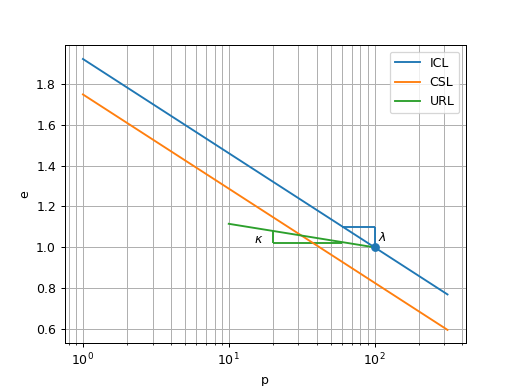

In [138]:
lam = 0.2
kap = 0.05
ec = 1
pc = 100
pcrit = 0.5*pc
ecrit = ec - kap*np.log(pc/pcrit)
fig, ax = plt.subplots()
p_plot = np.logspace(0,2.5,100)
p_unload = np.logspace(2,1,100)
e_icl = ec - lam*np.log(p_plot/pc)
e_csl = ecrit - lam*np.log(p_plot/pcrit)
e_unload = ec - kap*np.log(p_unload/pc)
ax.plot(p_plot,e_icl,label='ICL')
ax.plot(p_plot,e_csl,label='CSL')
ax.plot()
ax.set_xscale('log')
ax.grid(True, which='both')
ax.set_xlabel('p')
ax.set_ylabel('e')
ax.vlines(x=100,ymin=1,ymax=1.1,colors='C0')
ax.hlines(y=1.1,xmin=60,xmax=100,colors='C0')
ax.annotate(r'$\lambda$',xy=(105,1.03))
ax.plot(p_unload,e_unload,label='URL')
ax.vlines(x=20,ymin = 1.02, ymax=ec+kap*np.log(100/20),colors='C2')
ax.hlines(y=1.02,xmin=20,xmax=60,colors='C2')
ax.annotate(r'$\kappa$',xy=(15,1.02))
ax.scatter(pc,ec,c='C0',zorder=3)
ax.legend()

## Flow Rule

Cam Clay uses an associated flow rule in which the directions of plastic strain increments are the same as the directions of stress increments.

$\dot{\varepsilon}_q^p = \gamma\frac{\partial F}{\partial q} = \gamma \frac{2q}{M^2}$  

$\dot{\varepsilon}_v^p = \gamma\frac{\partial F}{\partial p} = \gamma \left(2p - p_c\right)$  

## Hardening

Cam Clay uses an isotropic hardening rule in which the evolution of the elliptical yield surface is represented by the change in $p_c$. Note that $\dot{p_c} = 0$ for elastic loading. When plastic loading occurs, $\dot{\varepsilon}_v^p > 0$ and $\left|\dot{p}_c\right| > 0$. 

Derivation of the hardening expression follows the unload-reload stress path in the figure below. 

The path from point 1 to 2 is elasto-plastic, meaning that it includes elastic and plastic volumetric strains. The change in void ratio from point 1 to point 2 is given by:  

$de_{1/2} = -\left[e_c - \lambda \left(\frac{p_1}{p_c}\right)\right]$  

The path from point 2 to 3 is elastic, meaning that it includes only recoverable elastic volumetric strains. The change in void ratio from point 2 to 3 is given by:  

$de_{2/3} = \left[e_c - \kappa \left(\frac{p_1}{p_c}\right)\right]$  

The plastic portion of the void ratio change between points 1 and 3 is computed as the difference of the elastic and plastic components:  

$de^p_{1/3} = -\left[e_c - \left(\lambda - \kappa \right) \left(\frac{p_1}{p_c}\right)\right]$  

Substituting $\epsilon^p_v = -\frac{de^p}{1+e}$:  

$\epsilon^p\left(1+e\right) = -\left[e_c - \left(\lambda - \kappa \right) \left(\frac{p_1}{p_c}\right)\right]$ 

Solving for $p_1$:  

$p_1 = p_c exp\left(\frac{\epsilon^p_v \left(1+e\right)}{\left(\lambda-\kappa\right)}\right)$  

Differentiating with respect to $\epsilon^p_v$:  

$\frac{d p_1}{d\epsilon^p_v} = p_c\frac{\left(1+e\right)}{\left(\lambda - \kappa\right)} exp\left(\frac{\epsilon^p_v \left(1+e\right)}{\left(\lambda-\kappa\right)}\right)$  

Taking limit as $\epsilon^p_v$ goes to zero (and $p_1$ goes to $p_c$):  

$\lim_{\epsilon^p_v\to 0} \frac{dp_c}{d\epsilon^p_v} = p_c\frac{\left(1+e\right)}{\left(\lambda-\kappa\right)}$  

Moving the $\epsilon^p_v$ to the right side, and differentiating with respect to time gives us the isotropic hardening expression below.  

$\dot{p}_c = \frac{1+e}{\lambda - \kappa} p_c \dot{\varepsilon}_v^p$  



<IPython.core.display.Javascript object>


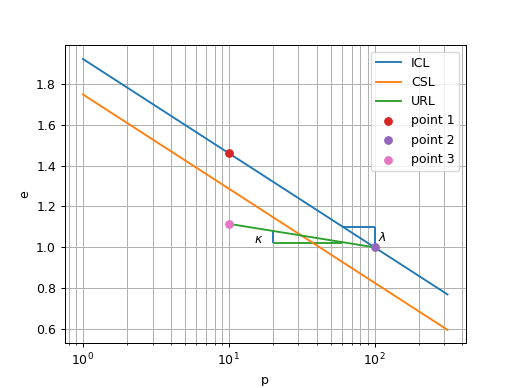

In [139]:
lam = 0.2
kap = 0.05
ec = 1
pc = 100
pcrit = 0.5*pc
ecrit = ec - kap*np.log(pc/pcrit)
fig, ax = plt.subplots()
p_plot = np.logspace(0,2.5,100)
p_unload = np.logspace(2,1,100)
e_icl = ec - lam*np.log(p_plot/pc)
e_csl = ecrit - lam*np.log(p_plot/pcrit)
e_unload = ec - kap*np.log(p_unload/pc)
ax.plot(p_plot,e_icl,label='ICL')
ax.plot(p_plot,e_csl,label='CSL')
ax.plot()
ax.set_xscale('log')
ax.set_xlabel('p')
ax.set_ylabel('e')
ax.vlines(x=100,ymin=1,ymax=1.1,colors='C0')
ax.hlines(y=1.1,xmin=60,xmax=100,colors='C0')
ax.annotate(r'$\lambda$',xy=(105,1.03))
ax.plot(p_unload,e_unload,label='URL')
ax.vlines(x=20,ymin = 1.02, ymax=ec+kap*np.log(100/20))
ax.hlines(y=1.02,xmin=20,xmax=60,colors='C2')
ax.annotate(r'$\kappa$',xy=(15,1.02))
ax.scatter(10,ec - lam*np.log(10/pc),c='C3', label='point 1',zorder=3)
ax.scatter(pc,ec,c='C4',label='point 2',zorder=3)
ax.scatter(10,ec - kap*np.log(10/pc),c='C6', label='point 3',zorder=3)
ax.grid(True, which='both')

ax.legend()

# Return mapping

$\dot{f} = \frac{\partial f}{\partial p}\dot{p} + \frac{\partial f}{\partial q}\dot{q} + \frac{\partial f}{\partial p_c}\dot{p_c} = 0$  

$\frac{\partial f}{\partial p} = 2p - p_c$  

$\frac{\partial f}{\partial q} = \frac{2q}{M^2}$  

$\frac{\partial f}{\partial p_c} = -p$  

$\dot{p} = K\left(\dot{\varepsilon_v} - \dot{\varepsilon_v^p}\right)$ 

$\dot{q} = 3G\left(\dot{\varepsilon_q} - \dot{\varepsilon_q^p}\right)$  

$\dot{p_c} = \frac{1+e}{\lambda - \kappa} p_c \dot{\varepsilon}_v^p$  

$\dot{\epsilon_v^p} = \gamma \frac{\partial f}{\partial p}$  

$\dot{\epsilon_q^p} = \gamma \frac{\partial f}{\partial q}$  

## Implicit integration

A partially implicit integration scheme was presented by Borja and Lee (1990), which is available at the link below.

https://www.sciencedirect.com/science/article/abs/pii/004578259090152C

Their implementation treats the nonlinear elasticity explicitly, and involves Newton-Raphson iterations to solve for $\gamma$. It also uses sub-iterations to solve for $p_{i+1}$ and $p_{c,i+1}$ since they are linked in an implicit manner. This notebook will use explicit integration for simplicity.

## Explicit integration  

The explicit integration algorithm is developed by setting $\dot{f} = 0$ and using the values of internal variables at the beginning of the time step to perform the updating. The expression is  

$\dot{f} = \left(2p_i - p_{c,i}\right)K\left[\Delta\varepsilon_v - \Delta\gamma \left(2p_i - p_{c,i}\right)\right] + \frac{2q_i}{M^2}3G_i\left(\Delta\varepsilon_q - \Delta\gamma \frac{2q_i}{M^2}\right) -p_i\frac{1+e}{\lambda - \kappa} p_{c,i} \Delta\gamma \left(2p_i - p_{c,i}\right) = 0$  

Solving for $\Delta\gamma$ provides  

$\Delta\gamma = \frac{3G_i\Delta\varepsilon_q \frac{2q_i}{M^2} + K_i\Delta\varepsilon_v\left(2p_i-p_{c,i}\right)}{K_i\left(2p_i-p_{c,i}\right)^2 +3G_i\left(\frac{2q_i}{M^2}\right)^2 + p_ip_{c,i}\left(2p_i-p_{c,i}\right)\frac{1+e}{\lambda-\kappa}}$

# Undrained monotonic loading

For undrained loading, $\dot{\varepsilon}_v = 0$. So we need to specify a vector of zeros for $\varepsilon_v$ and a vector of $\varepsilon_q$, and solve for the corresponding p and q at each time step.

<IPython.core.display.Javascript object>


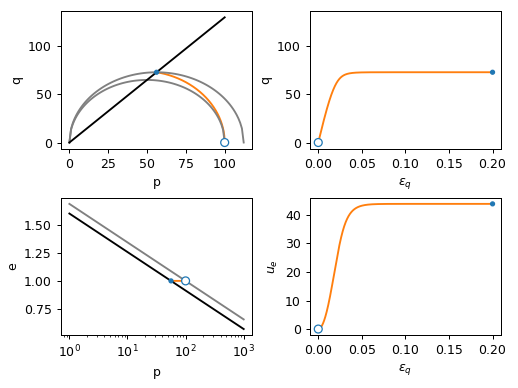

In [142]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt

# Undrained monotonic stress path
N = 10000
eq_max = 0.2
eq = np.linspace(0,eq_max,N)
ev = np.zeros(N)
ev = np.linspace(0,-0.0*eq_max,N)

pc = np.zeros(N)
p = np.zeros(N)
q = np.zeros(N)
e = np.zeros(N)
ue = np.zeros(N)
nu = 0.3
M = 1.3
pc[0] = 100
p[0] = 100
q[0] = 0
e[0] = 1.0
OCR0 = pc[0]/p[0]
nu = 0.3
lam = 0.15
kap = 0.025
deps_qp = 0.0
deps_vp = 0.0

for i in range(1,N):
    deps_q = eq[i]-eq[i-1]
    deps_v = ev[i]-ev[i-1]
    K = p[i-1]*(1+e[i-1])/kap
    G = K*(1-2*nu)/(2*(1+nu))
    q[i] = q[i-1] + 3*G*(deps_q - deps_qp)
    p[i] = p[i-1] + K*(deps_v - deps_vp)
    pc[i] = pc[i-1] + (1+e[i-1])/(lam-kap)*pc[i-1]*deps_vp
    f = (q[i]/M)**2 + p[i]*(p[i]-pc[i])
    e[i] = e[i-1] - deps_v*(1+e[i-1])
    if(f<=0):
        deps_vp = 0
        deps_qp = 0
    else:
        dgamma = ((2*p[i]-pc[i])*K*deps_v + 6*q[i]*G/M**2*deps_q)/(K*(2*p[i]-pc[i])**2 + 3*G*(2*q[i]/M**2)**2 + p[i]*pc[i]*(2*p[i]-pc[i])*(1+e[i])/(lam-kap))
        deps_qp = dgamma*2*q[i]/M**2
        deps_vp = dgamma*(2*p[i]-pc[i])
ue = p[0] - p[:]
#Plot yield surfaces at beginning and end of loading
N2 = 100
p_plot0 = np.linspace(0,pc[0],N2)
q_plot0 = np.zeros(N2)
p_plot1 = np.linspace(0,pc[-1],N2)
q_plot1 = np.zeros(N2)
q_plot2 = M*p_plot0
p_plot_ncl = np.logspace(0,3,N2)
e_ncl = e[0] - kap*np.log(pc[0]/p[0])
e_csl = e_ncl - (lam-kap)*np.log(2)
e_plot_ncl = np.zeros(N2)
e_plot_csl = np.zeros(N2)
for i in range(N2):
    q_plot0[i] = M*np.sqrt(p_plot0[i]*(pc[0]-p_plot0[i]))
    q_plot1[i] = M*np.sqrt(p_plot1[i]*(pc[-1]-p_plot1[i]))
    e_plot_ncl[i] = e_ncl - lam*np.log(p_plot_ncl[i]/pc[0])
    e_plot_csl[i] = e_csl - lam*np.log(p_plot_ncl[i]/pc[0])
fig, ax = plt.subplots(2,2)
ax[0,0].plot(p,q,zorder=2,c='C1')
ax[0,0].plot(p_plot0,q_plot0,c='gray')
ax[0,0].plot(p_plot1,q_plot1,c='gray')
ax[0,0].plot(p_plot0,q_plot2,c='Black')
ax[0,0].scatter([p[0],p[-1]],[q[0],q[-1]],c=['white','C0'],s=[40,10],edgecolor='C0',zorder=3)
ax[0,1].plot(eq,q,c='C1')
ax[0,1].scatter([eq[0],eq[-1]],[q[0],q[-1]],c=['white','C0'],s=[40,10],edgecolor='C0',zorder=3)
ax[1,0].plot(p,e,c='C1')
ax[1,0].plot(p_plot_ncl,e_plot_ncl,c='gray')
ax[1,0].plot(p_plot_ncl,e_plot_csl,c='black')
ax[1,0].scatter([p[0],p[-1]],[e[0],e[-1]],c=['white','C0'],s=[40,10],edgecolor='C0',zorder=3)
ax[1,0].set_xscale('log')
ax[1,1].plot(eq,ue,c='C1')
ax[1,1].scatter([eq[0],eq[-1]],[ue[0],ue[-1]],c=['white','C0'],s=[40,10],edgecolor='C0',zorder=3)
ax[0,0].set_ylabel('q')
ax[0,0].set_xlabel('p')
ax[1,0].set_ylabel('e')
ax[1,0].set_xlabel('p')
ax[0,1].set_ylabel('q')
ax[0,1].set_xlabel(r'$\varepsilon_q$')
ax[1,1].set_ylabel(r'$u_e$')
ax[1,1].set_xlabel(r'$\varepsilon_q$')
ax[0,1].sharey(ax[0,0])
plt.tight_layout()

# Drained monotonic loading

For drained loading, $\dot{\varepsilon}_v \neq 0$, and we don't know it up front. Rather, we know the stress path, which is a relationship between $\dot{q}$ and $\dot{p}$. Specifically, we know that $\dot{p} = \alpha\dot{q}$, where $\alpha=0$ for a direct simple shear stress path, and $\alpha = 1/3$ for a triaxial compression stress path.

If we had an implicit integration algorithm, we would use the consistent tangent relationship and Newton-Raphson iterations to solve for the converged state. But we are using an explicit integration algorithm, so we can cheat a little bit and first solve for $q[i]$ based on the i-1 state of the variables. Then we can solve for $p[i]$ from our known stress path relationship, and then solve for $\epsilon_v^e[i]$ based on the change in p. 

<IPython.core.display.Javascript object>


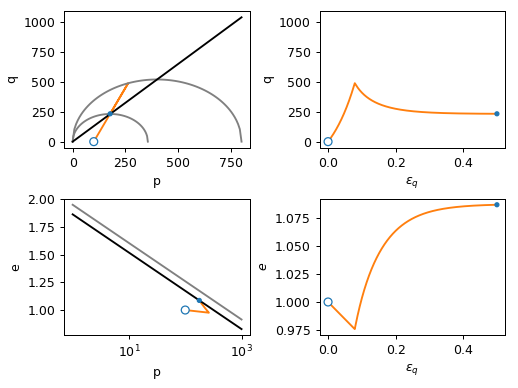

In [143]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt

# Drained monotonic stress path
N = 10000
alpha = 1/3
eq_max = 0.5
eq = np.linspace(0,eq_max,N)
ev = np.zeros(N)

pc = np.zeros(N)
p = np.zeros(N)
q = np.zeros(N)
e = np.zeros(N)
ue = np.zeros(N)
nu = 0.3
M = 1.3
pc[0] = 800
p[0] = 100
q[0] = 0
e[0] = 1.0
OCR0 = pc[0]/p[0]
nu = 0.3
lam = 0.15
kap = 0.025
deps_qp = 0.0
deps_vp = 0.0

for i in range(1,N):
    deps_q = eq[i]-eq[i-1]
    K = p[i-1]*(1+e[i-1])/kap
    G = K*(1-2*nu)/(2*(1+nu))
    q[i] = q[i-1] + 3*G*(deps_q - deps_qp)
    p[i] = p[i-1] + alpha*(q[i]-q[i-1])
    pc[i] = pc[i-1] + (1+e[i-1])/(lam-kap)*pc[i-1]*deps_vp
    deps_v = deps_vp + (p[i]-p[i-1])/K
    ev[i] = ev[i-1] + deps_v
    e[i] = e[i-1] - deps_v*(1+e[i-1])
    f = (q[i]/M)**2 + p[i]*(p[i]-pc[i-1])
    if(f<=0):
        deps_vp = 0
        deps_qp = 0
    else:
        dgamma = ((2*p[i]-pc[i])*K*deps_v + 6*q[i]*G/M**2*deps_q)/(K*(2*p[i]-pc[i])**2 + 3*G*(2*q[i]/M**2)**2 + p[i]*pc[i]*(2*p[i]-pc[i])*(1+e[i])/(lam-kap))
        deps_qp = dgamma*2*q[i]/M**2
        deps_vp = dgamma*(2*p[i]-pc[i])
        

#Plot yield surfaces at beginning and end of loading
N2 = 100
p_plot0 = np.linspace(0,pc[0],N2)
q_plot0 = np.zeros(N2)
p_plot1 = np.linspace(0,pc[-1],N2)
q_plot1 = np.zeros(N2)
q_plot2 = M*p_plot0
p_plot_ncl = np.logspace(0,3,N2)
e_ncl = e[0] - kap*np.log(pc[0]/p[0])
e_csl = e_ncl - (lam-kap)*np.log(2)
e_plot_ncl = np.zeros(N2)
e_plot_csl = np.zeros(N2)
for i in range(N2):
    q_plot0[i] = M*np.sqrt(p_plot0[i]*(pc[0]-p_plot0[i]))
    q_plot1[i] = M*np.sqrt(p_plot1[i]*(pc[-1]-p_plot1[i]))
    e_plot_ncl[i] = e_ncl - lam*np.log(p_plot_ncl[i]/pc[0])
    e_plot_csl[i] = e_csl - lam*np.log(p_plot_ncl[i]/pc[0])
fig, ax = plt.subplots(2,2)
ax[0,0].plot(p,q,zorder=2,c='C1')
ax[0,0].plot(p_plot0,q_plot0,c='gray')
ax[0,0].plot(p_plot1,q_plot1,c='gray')
ax[0,0].plot(p_plot0,q_plot2,c='Black')
ax[0,0].scatter([p[0],p[-1]],[q[0],q[-1]],c=['white','C0'],s=[40,10],edgecolor='C0',zorder=3)
ax[0,1].plot(eq,q,c='C1')
ax[0,1].scatter([eq[0],eq[-1]],[q[0],q[-1]],c=['white','C0'],s=[40,10],edgecolor='C0',zorder=3)
ax[1,0].plot(p,e,c='C1')
ax[1,0].plot(p_plot_ncl,e_plot_ncl,c='gray')
ax[1,0].plot(p_plot_ncl,e_plot_csl,c='black')
ax[1,0].scatter([p[0],p[-1]],[e[0],e[-1]],c=['white','C0'],s=[40,10],edgecolor='C0',zorder=3)
ax[1,0].set_xscale('log')
ax[1,1].plot(eq,e,c='C1')
ax[1,1].scatter([eq[0],eq[-1]],[e[0],e[-1]],c=['white','C0'],s=[40,10],edgecolor='C0',zorder=3)
ax[0,0].set_ylabel('q')
ax[0,0].set_xlabel('p')
ax[1,0].set_ylabel('e')
ax[1,0].set_xlabel('p')
ax[0,1].set_ylabel('q')
ax[0,1].set_xlabel(r'$\varepsilon_q$')
ax[1,1].set_ylabel(r'$e$')
ax[1,1].set_xlabel(r'$\varepsilon_q$')
ax[0,1].sharey(ax[0,0])
plt.tight_layout()